In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
import sys

In [13]:
path = 'C:/Users/robho/OneDrive/Desktop/Uni Work/Year 4/project2/data/100x'

In [16]:
os.mkdir('data')

In [ ]:
os.listdir(path)

[]

In [15]:
os.rmdir('data')

In [1]:
import numpy as np

In [5]:
from error_algorithms import IoU

In [6]:
groundarray = np.array([[0,3,3,3,0],
                        [2,0,1,0,0],
                        [2,0,1,0,0],
                        [2,0,1,0,0],
                        [0,0,0,0,0]])

imagearray = np.array([[0,0,3,3,0],
                       [2,0,0,1,0],
                       [2,0,1,0,0],
                       [2,0,1,0,0],
                       [2,0,0,0,0]])

In [7]:
print(np.where(groundarray == 1 or imagearray == 1))
print(np.where(groundarray == 1 and imagearray == 1))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [16]:
print(groundarray[np.where(groundarray == 1) and np.where(imagearray == 1)])
print(groundarray[np.where(groundarray == 1) or np.where(imagearray == 1)])
print(imagearray[np.where(groundarray == 1) and np.where(imagearray == 1)])
print(imagearray[np.where(groundarray == 1) or np.where(imagearray == 1)])

[0 1 1]
[1 1 1]
[1 1 1]
[0 1 1]


In [18]:
print(groundarray[np.where(np.any(groundarray == 1 and imagearray == 1))])
print(groundarray[np.where(groundarray == 1) or np.where(imagearray == 1)])
print(imagearray[np.where(groundarray == 1) and np.where(imagearray == 1)])
print(imagearray[np.where(groundarray == 1) or np.where(imagearray == 1)])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [19]:
print(groundarray[np.any(np.where(groundarray == 1) and np.where(imagearray == 1))])
print(groundarray[np.where(groundarray == 1) or np.where(imagearray == 1)])
print(imagearray[np.where(groundarray == 1) and np.where(imagearray == 1)])
print(imagearray[np.where(groundarray == 1) or np.where(imagearray == 1)])

[[[0 3 3 3 0]
  [2 0 1 0 0]
  [2 0 1 0 0]
  [2 0 1 0 0]
  [0 0 0 0 0]]]
[1 1 1]
[1 1 1]
[0 1 1]


In [91]:
a = np.where(groundarray == 1)
b = np.where(imagearray == 1)

In [81]:
acs = np.array([a[0],a[1]]).T
bcs = np.array([b[0],b[1]]).T

In [90]:
tupa = [tuple(item) for item in acs]
tupb = [tuple(item) for item in bcs]
print(len(set(tupa).union(tupb)))
print(len(set(tupa).intersection(tupb)))

4
2


In [93]:
def andoveror(a,b):
    acs = np.array([a[0],a[1]]).T
    bcs = np.array([b[0],b[1]]).T
    tupa = [tuple(item) for item in acs]
    tupb = [tuple(item) for item in bcs]
    return len(set(tupa).intersection(tupb))/len(set(tupa).union(tupb))

In [94]:
andoveror(a,b)

0.5

In [25]:
print(b or a)
print(a)
print(b)

(array([1, 2, 3], dtype=int64), array([3, 2, 2], dtype=int64))
(array([1, 2, 3], dtype=int64), array([2, 2, 2], dtype=int64))
(array([1, 2, 3], dtype=int64), array([3, 2, 2], dtype=int64))


In [63]:
ax = list(a[0])
ay = list(a[1])
bx = list(b[0])
by = list(b[1])

In [67]:
print([ax,ay,ax])

[[1, 2, 3], [2, 2, 2], [1, 2, 3]]


In [69]:
print(list(zip([ax,ay,ax])))

[([1, 2, 3],), ([2, 2, 2],), ([1, 2, 3],)]


In [74]:
acs = np.array([ax,ay]).T
bcs = np.array([bx,by]).T

In [75]:
for a in acs:
    print(type(a))
    print(a)

<class 'list'>
[1, 2]
<class 'list'>
[2, 2]
<class 'list'>
[3, 2]


In [76]:
new = set(acs).intersection(bcs)
print(new)

TypeError: unhashable type: 'list'

In [53]:
thing = {(1,2),(1,3),(1,4)}

In [55]:
print(len(thing))
print(type(thing))

3
<class 'set'>


In [95]:
a = None
b = 3
a % b

TypeError: unsupported operand type(s) for %: 'NoneType' and 'int'

In [96]:
b%a

TypeError: unsupported operand type(s) for %: 'int' and 'NoneType'

In [1]:
import random

In [2]:
indices = random.sample(range(500),20)
for i,x in enumerate(indices):
    print(x == indices[i])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [2]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt
from scipy import ndimage
from error_algorithms import IoU
from scipy import stats
from scipy.ndimage import gaussian_filter
from interpolate import linear_interpolate

In [108]:
img = tifffile.imread("fluo/30x test/bernsen/synth_00001bernsen.tif")/255
img, num_features = ndimage.label(img, np.ones((3,3)))
mask = tifffile.imread("fluo/30x test/masks/synth_00001.tif")
real = gaussian_filter(tifffile.imread("fluo/30x test/convolutions/synth_00001.tif"),1)
real2 = tifffile.imread("fluo/30x test/convolutions/synth_00001.tif")
#check whether IoU actually penalises for missing a whole cell

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


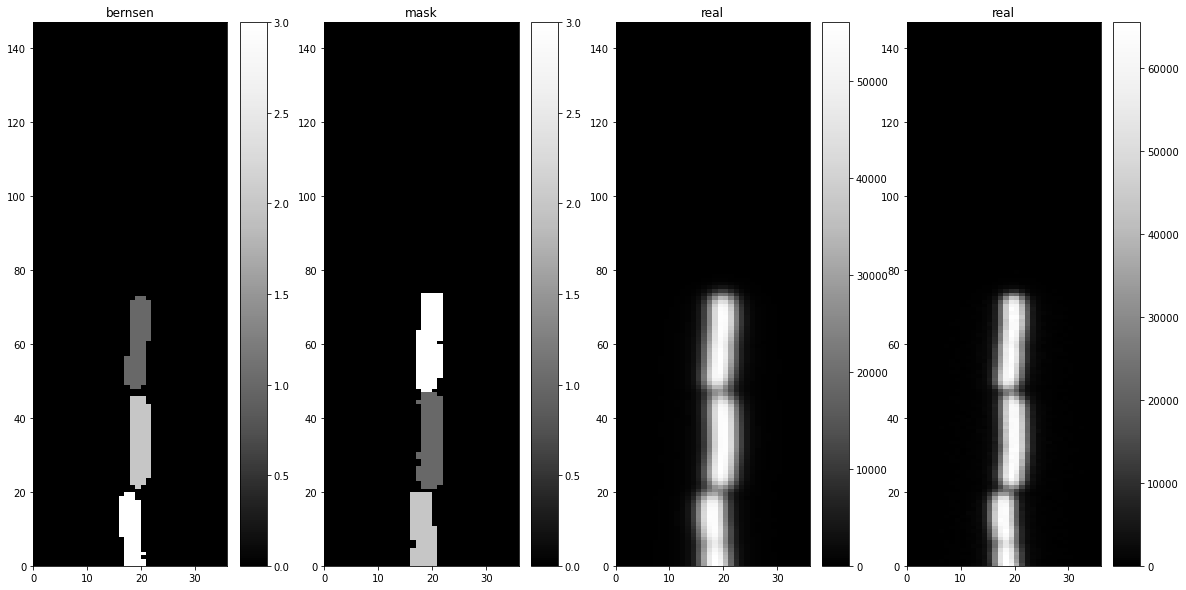

In [109]:
plt.rcParams["figure.figsize"] = [20,10]
fig, axs = plt.subplots(1,4)
thing1 = axs[0].pcolor(img[::-1],cmap="Greys_r")
axs[0].set_title("bernsen")
plt.colorbar(thing1, ax=axs[0])
thing2 = axs[1].pcolor(mask[::-1],cmap="Greys_r")
axs[1].set_title("mask")
plt.colorbar(thing2,ax=axs[1])
thing3 = axs[2].pcolor(real[::-1],cmap="Greys_r")
axs[2].set_title("real")
plt.colorbar(thing3,ax=axs[2])
thing4 = axs[3].pcolor(real2[::-1],cmap="Greys_r")
axs[3].set_title("real")
plt.colorbar(thing4,ax=axs[3])
plt.show()

In [101]:
arr = IoU(mask,img)
arr, np.mean(arr[:,0]/arr[:,1])

(array([[ 93, 109],
        [ 72,  89],
        [ 92, 118]]),
 0.8139535967228028)

In [3]:
import os
import shutil

In [111]:
for dir in os.listdir("omnipose_SyMBac_TD_fl"):
    if "x test" in dir:
        print(dir)
        os.mkdir("omnipose_SyMBac_TD_fl/"+dir+"/otsu")
        os.mkdir("omnipose_SyMBac_TD_fl/"+dir+"/bernsen")
        os.mkdir("omnipose_SyMBac_TD_fl/"+dir+"/watershed")

100x test
20x test
25x test
30x test
35x test
40x test
60x test


In [114]:
os.listdir("omnipose_SyMBac_TD_fl/100x test/")

['bernsen',
 'convolutions',
 'masks',
 'omnipose segmentations',
 'otsu',
 'stardist',
 'watershed']

In [123]:
name = "fluo"
for dir in os.listdir(name):
    if "x test" in dir:
        print(dir)
        for file in os.listdir(name+"/"+dir+"/bernsen"):
            if "watershed" in file:
                shutil.move(name+"/"+dir+"/bernsen/"+file,name+"/"+dir+"/watershed/"+file)

100x test
20x test
25x test
30x test
35x test
40x test
60x test


In [6]:
name = "fluo/"
for dir in os.listdir(name):
    if "x test" in dir:
        print(dir)
        os.mv(name+dir+"/"+dir[:4]+"blur",name+"/"+dir[:4]+"blur")

100x test


AttributeError: module 'os' has no attribute 'mv'

In [16]:
from PIL import Image

In [18]:
name = "fluo/"
for dir in os.listdir(name):
    if "x test" in dir:
        newdir = name+dir[:4]+"blur/"
        try:
            os.mkdir(newdir)
            os.mkdir(newdir+"convolutions")
            os.mkdir(newdir+"masks")
            os.mkdir(newdir+"watershed")
            os.mkdir(newdir+"bernsen")
            os.mkdir(newdir+"otsu")
        except:
            pass
        for file in os.listdir(name+dir+"/convolutions"):
            img = tifffile.imread(name+dir+"/convolutions/"+file)
            mask = tifffile.imread(name+dir+"/masks/"+file)
            if "20" in dir:
                img = linear_interpolate(gaussian_filter(img,2.2),(256//(100/20),46//(100/20)))
                mask = linear_interpolate(mask,(mask.shape[0]//(100/20),mask.shape[1]//(100/20)))
            elif "25" in dir:
                img = linear_interpolate(gaussian_filter(img,2),(256//(100/25),46//(100/25)))
                mask = linear_interpolate(mask,(mask.shape[0]//(100/25),mask.shape[1]//(100/25)))
            elif "30" in dir:
                img = linear_interpolate(gaussian_filter(img,1.8),(256//(100/30),46//(100/30)))
                mask = linear_interpolate(mask,(mask.shape[0]//(100/30),mask.shape[1]//(100/30)))
            elif "35" in dir:
                img = linear_interpolate(gaussian_filter(img,1.6),(256//(100/35),46//(100/35)))
                mask = linear_interpolate(mask,(mask.shape[0]//(100/35),mask.shape[1]//(100/35)))
            elif "40" in dir:
                img = linear_interpolate(gaussian_filter(img,1.4),(256//(100/40),46//(100/40)))
                mask = linear_interpolate(mask,(mask.shape[0]//(100/40),mask.shape[1]//(100/40)))
            elif "60" in dir:
                img = linear_interpolate(gaussian_filter(img,1.2),(256//(100/60),46//(100/60)))
                mask = linear_interpolate(mask,(mask.shape[0]//(100/60),mask.shape[1]//(100/60)))
            elif "100" in dir:
                img = linear_interpolate(gaussian_filter(img,1),(256//(100/100),46//(100/100)))
                mask = linear_interpolate(mask,(mask.shape[0]//(100/100),mask.shape[1]//(100/100)))
            img = Image.fromarray(img)
            img.save(newdir+"convolutions/"+file)
            mask = Image.fromarray(mask)
            mask.save(newdir+"masks/"+file)

In [117]:
s = "abcde"
s[3] = "f"

TypeError: 'str' object does not support item assignment

In [14]:
None!=3

True